In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os 
import glob
import argparse
from tqdm import tqdm
from pathlib import Path

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation

import keras
from keras.layers import LSTM
from keras import Model, layers
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

import skimage.io
from skimage.io import imread, imshow
from skimage.transform import resize

### 1. Повнозв'язані нейронні мережі

In [2]:
df = pd.read_csv("C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\rating\\Video_games_esrb_rating.csv",sep=",", low_memory=False)
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [3]:
df=df.drop([ 'title'], axis = 1)
df=df.drop(['fantasy_violence','alcohol_reference','cartoon_violence','console','animated_blood', 'mild_lyrics', 'mild_language', 'strong_sexual_content', 'nudity', 'use_of_drugs_and_alcohol', 'partial_nudity', 'mild_violence', 'mature_humor', 'use_of_alcohol', 'drug_reference', 'strong_janguage', 'lyrics'], axis = 1)

In [4]:
s = df['esrb_rating']
s, unique = pd.factorize(s)
df['esrb_rating'] = s  
df['esrb_rating'].value_counts()

3    689
0    416
1    403
2    387
Name: esrb_rating, dtype: int64

In [5]:
continuousColumns = ["blood", "blood_and_gore", "crude_humor", "intense_violence", "language", "mild_blood", "mild_cartoon_violence", "mild_fantasy_violence", "mild_suggestive_themes", "no_descriptors", "sexual_content", "sexual_themes", "simulated_gambling", "suggestive_themes", "violence"]
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)
df.head()

,blood,blood_and_gore,crude_humor,intense_violence,language,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_suggestive_themes,no_descriptors,sexual_content,sexual_themes,simulated_gambling,suggestive_themes,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3


In [6]:
x = df
y = pd.DataFrame(df['esrb_rating'],columns=['esrb_rating'])
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['esrb_rating'])
yTest = pd.get_dummies(data=yTest,columns =['esrb_rating'])

In [7]:
model = keras.Sequential([layers.Dense(4, activation="softmax")])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(xTrain, yTrain, epochs=100, batch_size=64, validation_data=(xTest, yTest), verbose = 1)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.8820 - accuracy: 0.1868 - val_loss: 0.8683 - val_accuracy: 0.1693
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8430 - accuracy: 0.1852 - val_loss: 0.8313 - val_accuracy: 0.1725
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8082 - accuracy: 0.1812 - val_loss: 0.7981 - val_accuracy: 0.1661
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7772 - accuracy: 0.1789 - val_loss: 0.7685 - val_accuracy: 0.1661
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7495 - accuracy: 0.1805 - val_loss: 0.7422 - val_accuracy: 0.1677
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7249 - accuracy: 0.1875 - val_loss: 0.7188 - val_accuracy: 0.1757
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7031 - accuracy: 0.2017 - val_loss: 0.6979 - val_accuracy: 0.1965
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.4192 - val_loss: 0.4642 - val_accuracy: 0.4345
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.4192 - val_loss: 0.4629 - val_accuracy: 0.4345
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.4177 - val_loss: 0.4617 - val_accuracy: 0.4361
Epoch 62/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.4192 - val_loss: 0.4605 - val_accuracy: 0.4377
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.4192 - val_loss: 0.4592 - val_accuracy: 0.4377
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.4192 - val_loss: 0.4581 - val_accuracy: 0.4377
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.4192 - val_loss: 0.4569 - val_accuracy: 0.4377
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

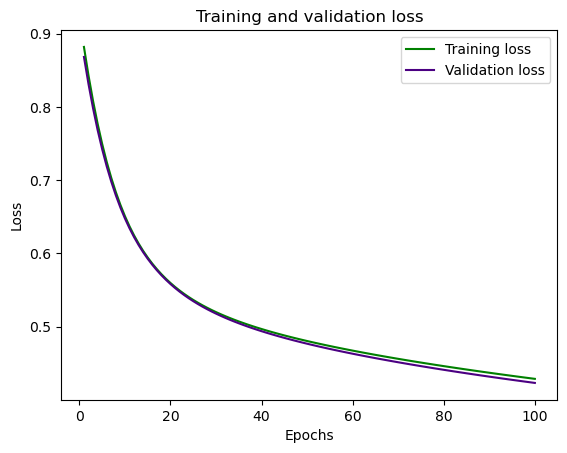

In [9]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "indigo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
score = model.evaluate(xTest, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.42304304242134094
Test accuracy: 0.5974441170692444


### 2. Згорткові нейронні мережі

In [11]:
train_dir='C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\chest_xray\\train'
test_dir='C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\chest_xray\\val' 

In [12]:
training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
).flow_from_directory(train_dir,batch_size=8,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
).flow_from_directory(test_dir,batch_size=8,target_size=(224,224),shuffle=True)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [14]:
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(2,activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 2)                

In [16]:
model.compile(loss='categorical_crossentropy', metrics=["accuracy"],optimizer='adam')
history=model.fit(training,validation_data=validing,epochs=10,batch_size=64, verbose=1)

Epoch 1/10
652/652 [==============================] - 818s 1s/step - loss: 0.3452 - accuracy: 0.8957 - val_loss: 4.5789 - val_accuracy: 0.5000
Epoch 2/10
652/652 [==============================] - 804s 1s/step - loss: 0.1972 - accuracy: 0.9279 - val_loss: 2.3122 - val_accuracy: 0.5625
Epoch 3/10
652/652 [==============================] - 808s 1s/step - loss: 0.1845 - accuracy: 0.9352 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 4/10
652/652 [==============================] - 808s 1s/step - loss: 0.2828 - accuracy: 0.8777 - val_loss: 1.9258 - val_accuracy: 0.6250
Epoch 5/10
652/652 [==============================] - 816s 1s/step - loss: 0.2153 - accuracy: 0.9293 - val_loss: 0.7765 - val_accuracy: 0.7500
Epoch 6/10
652/652 [==============================] - 804s 1s/step - loss: 0.2035 - accuracy: 0.9214 - val_loss: 1.0394 - val_accuracy: 0.6250
Epoch 7/10
652/652 [==============================] - 4095s 6s/step - loss: 0.1790 - accuracy: 0.9317 - val_loss: 2.1323 - val_accuracy: 0.562

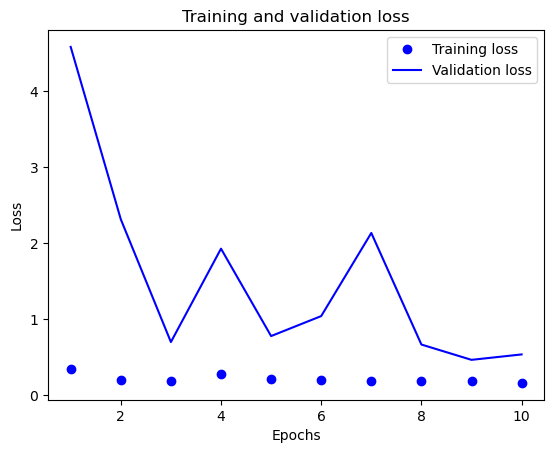

In [17]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
score = model.evaluate(validing) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

2/2 [==============================] - 1s 328ms/step - loss: 0.6580 - accuracy: 0.6875
Test score: 0.6579899787902832
Test accuracy: 0.6875


### 3. Рекурентні нейронні мережі

In [19]:
text = pd.read_csv('JEOPARDY_CSV.csv', encoding='latin-1')
text.drop(['Show Number',' Air Date', ' Category', ' Value', ' Answer'],axis=1,inplace=True)
text.columns = ['round','question']
text

,round,question
0,Jeopardy!,"For the last 8 years of his life, Galileo was ..."
1,Jeopardy!,No. 2: 1912 Olympian; football star at Carlisl...
2,Jeopardy!,The city of Yuma in this state has a record av...
3,Jeopardy!,"In 1963, live on ""The Art Linkletter Show"", th..."
4,Jeopardy!,"Signer of the Dec. of Indep., framer of the Co..."
...,...,...
216925,Double Jeopardy!,This Puccini opera turns on the solution to 3 ...
216926,Double Jeopardy!,In North America this term is properly applied...
216927,Double Jeopardy!,"In Penny Lane, where this ""Hellraiser"" grew up..."
216928,Double Jeopardy!,"From Ft. Sill, Okla. he made the plea, Arizona..."


In [20]:
Review_lenghts = list(map(len, text.question.values))
print('Max len ',np.max(Review_lenghts))
print('Min len ', np.min(Review_lenghts))
print('Mean size ',np.mean(Review_lenghts))
print('Median size ',np.median(Review_lenghts))

Max len  860
Min len  1
Mean size  86.15109021343291
Median size  86.0


In [21]:
text['round'].value_counts()

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: round, dtype: int64

In [22]:
text = text.drop(text[text['round'] == "Tiebreaker"].index)
text = text.drop(text[text['round'] == "Final Jeopardy!"].index)

In [23]:
text['round'].value_counts()

Jeopardy!           107384
Double Jeopardy!    105912
Name: round, dtype: int64

In [24]:
dictionary_length = 1000
input_length = 100

tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(text.question.values)

In [25]:
post_seq = tokenizer.texts_to_sequences(text.question.values)

In [26]:
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)

In [27]:
X = post_seq_padded
X_array = np.array(X)
Y = text['round'].values
Y = 1*(Y=='Jeopardy!')
Y_array = np.array(Y)

x, y = shuffle(X_array, Y_array, random_state=23)

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [29]:
model2 = Sequential()
model2.add(Embedding(dictionary_length, 2, input_length=input_length))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            2000      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          608       
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               1568      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                      

In [30]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history2 = model2.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
467/467 [==============================] - 74s 146ms/step - loss: 0.6911 - accuracy: 0.5225 - val_loss: 0.6841 - val_accuracy: 0.5550
Epoch 2/5
467/467 [==============================] - 67s 143ms/step - loss: 0.6792 - accuracy: 0.5587 - val_loss: 0.6835 - val_accuracy: 0.5466
Epoch 3/5
467/467 [==============================] - 66s 141ms/step - loss: 0.6671 - accuracy: 0.5766 - val_loss: 0.6644 - val_accuracy: 0.5705
Epoch 4/5
467/467 [==============================] - 65s 140ms/step - loss: 0.6596 - accuracy: 0.5813 - val_loss: 0.6567 - val_accuracy: 0.5744
Epoch 5/5
467/467 [==============================] - 66s 141ms/step - loss: 0.6485 - accuracy: 0.5885 - val_loss: 0.6569 - val_accuracy: 0.5654


In [32]:
history_dict = history2.history

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

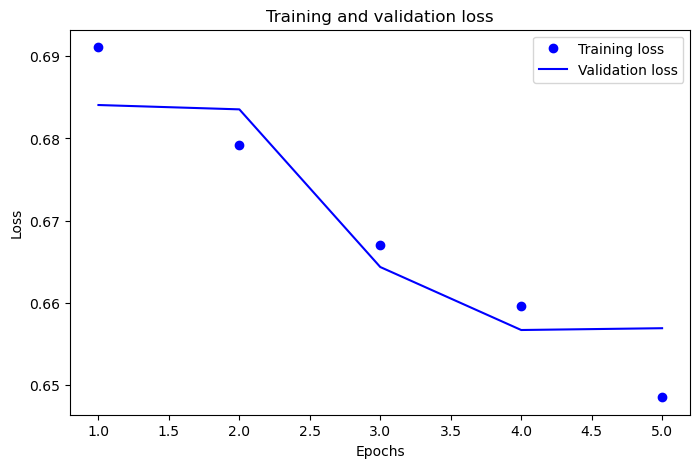

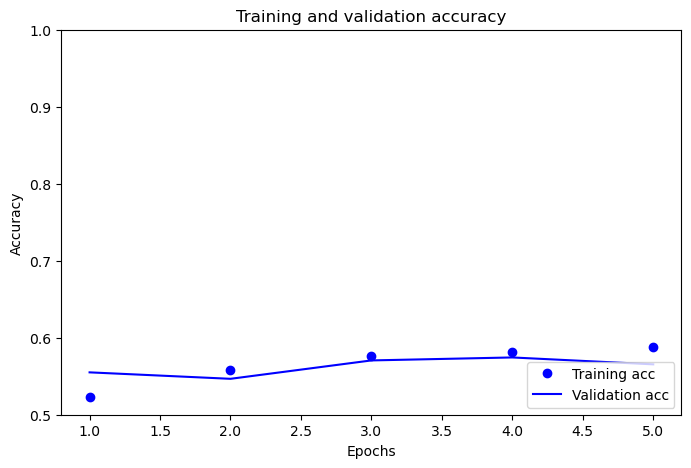

In [33]:
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(8,5))
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()